In [1]:
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import ast
from uncertainties import ufloat


In [2]:
directory = '.'
plength =pl.DataFrame({'time':[],'plength':[],'std':[],'Design': [], 'Run': []})
# angle = pl.DataFrame({'index':[],'Helical_pitch[deg]':[],'Design': [], 'Run': []})

In [3]:
def parse_list(value):
    # Remove the square brackets and convert the string to a list of floats
    return float(ast.literal_eval(value)[0])*0.8518

parse_list('[4]')

3.4072

In [5]:
for file in glob.glob(os.path.join(directory,'*.csv')):
    print(file)
    parts = file.split('_')
    design = parts[1]
    run = parts[2].split('.')[0]
    print(design,run)
    if 'plength' in file:
        df = pl.read_csv(file)
        df = df.with_columns(pl.col('plength').apply(parse_list).alias('plength'))
        df = df.with_columns(pl.col('std').apply(parse_list).alias('std'))
        df_time = pl.read_csv('./timestep_'+design+'_'+run+'.csv')
        df = pl.concat([df_time,df],how="horizontal")   
        # print(df)
    # if 'angle' in file:
    #     df = pl.read_csv(file,dtypes={'Helical_pitch[deg]':pl.Float64})
    #     df=df.with_row_index()
    #     # print(df)

    #Add new columns (these columns are ID columns to trace the data later on) to the DataFrame 
    constant_values = {'Design': design, 'Run': run}
    for column_name, value in constant_values.items():
            df = df.with_columns(pl.lit(value).alias(column_name))
    # print(df)

    #Merge all the files into one big DataFrame
    if 'plength' in file:
        plength = pl.concat([plength,df],how="vertical_relaxed")     

    # if 'angle' in file:
    #     angle = pl.concat([angle,df],how="vertical_relaxed")


./plength_wt_run3.csv
wt run3
./plength_wt_run2.csv
wt run2
./plength_wt_run1.csv
wt run1
./plength_spi_run1.csv
spi run1
./timestep_spi_run1.csv
spi run1
./plength_ribo_run2.csv
ribo run2
./plength_ribo_run3.csv
ribo run3
./plength_spi_run2.csv
spi run2


/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_20864/3676460934.py:9: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = df.with_columns(pl.col('plength').apply(parse_list).alias('plength'))
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_20864/3676460934.py:9: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(pl.col('plength').apply(parse_list).alias('plength'))
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_20864/3676460934.py:10: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = df.with_columns(pl.col('std').apply(parse_list).alias('std'))
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_20864/3676460934.py:10: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable 

./timestep_spi_run2.csv
spi run2
./plength_ribo_run1.csv
ribo run1
./timestep_spi_run3.csv
spi run3
./plength_spi_run3.csv
spi run3
./timestep_ribo_run2.csv
ribo run2
./timestep_ribo_run3.csv
ribo run3
./timestep_ribo_run1.csv
ribo run1
./timestep_wt_run1.csv
wt run1
./timestep_wt_run2.csv
wt run2
./timestep_wt_run3.csv
wt run3


/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_20864/3676460934.py:9: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = df.with_columns(pl.col('plength').apply(parse_list).alias('plength'))
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_20864/3676460934.py:9: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(pl.col('plength').apply(parse_list).alias('plength'))
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_20864/3676460934.py:10: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = df.with_columns(pl.col('std').apply(parse_list).alias('std'))
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_20864/3676460934.py:10: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable 

In [6]:
plength

time,plength,std,Design,Run
i64,f64,f64,str,str
500000,5769.207179,13.222927,"""wt""","""run3"""
1000000,5791.885488,12.717414,"""wt""","""run3"""
1500000,5719.234064,13.250896,"""wt""","""run3"""
2000000,6073.874803,14.333317,"""wt""","""run3"""
2500000,5784.054217,12.437075,"""wt""","""run3"""
…,…,…,…,…
998000000,3994.222212,8.302549,"""spi""","""run3"""
998500000,3940.047598,8.159052,"""spi""","""run3"""
999000000,3965.776087,8.214403,"""spi""","""run3"""


Text(0, 0.5, 'Value')

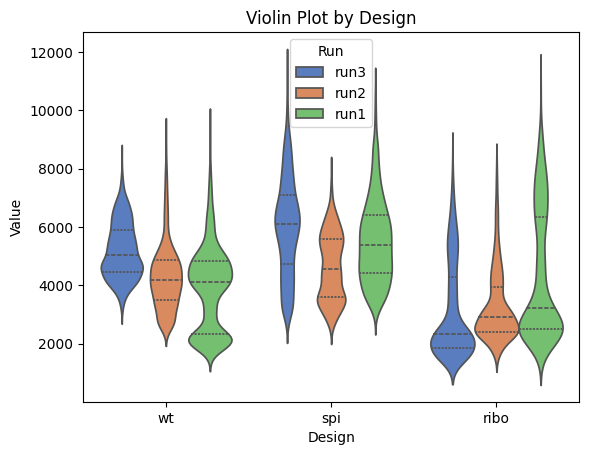

In [8]:
sns.violinplot(data=plength, x='Design', y='plength', hue='Run', inner="quart", density_norm='area', palette='muted')
plt.title('Violin Plot by Design')
plt.xlabel('Design')
plt.ylabel('Value')

In [14]:
filtered_last_df = plength.filter(pl.col('time') >= 900000000)
for index, group in filtered_last_df.group_by(['Design']):
    for i, g in group.group_by(['Run']):
        csvname= './10percent_'+str(index)+'_'+str(i)+'.csv'
        g.write_csv(csvname)
        print(i,index)
        if i[0] == 'run1' and index[0] == 'wt':
            print(g)

# print(filtered_last_df)

('run2',) ('spi',)
('run3',) ('spi',)
('run1',) ('spi',)
('run2',) ('wt',)
('run1',) ('wt',)
shape: (201, 5)
┌────────────┬─────────────┬──────────┬────────┬──────┐
│ time       ┆ plength     ┆ std      ┆ Design ┆ Run  │
│ ---        ┆ ---         ┆ ---      ┆ ---    ┆ ---  │
│ i64        ┆ f64         ┆ f64      ┆ str    ┆ str  │
╞════════════╪═════════════╪══════════╪════════╪══════╡
│ 900000000  ┆ 1973.186123 ┆ 5.705592 ┆ wt     ┆ run1 │
│ 900500000  ┆ 2005.607981 ┆ 5.485349 ┆ wt     ┆ run1 │
│ 901000000  ┆ 1998.260824 ┆ 5.803753 ┆ wt     ┆ run1 │
│ 901500000  ┆ 2047.1197   ┆ 6.132065 ┆ wt     ┆ run1 │
│ 902000000  ┆ 1931.921118 ┆ 5.877119 ┆ wt     ┆ run1 │
│ …          ┆ …           ┆ …        ┆ …      ┆ …    │
│ 998000000  ┆ 2086.249028 ┆ 4.657193 ┆ wt     ┆ run1 │
│ 998500000  ┆ 2105.699851 ┆ 4.667907 ┆ wt     ┆ run1 │
│ 999000000  ┆ 2193.79012  ┆ 5.002971 ┆ wt     ┆ run1 │
│ 999500000  ┆ 2085.304039 ┆ 4.809268 ┆ wt     ┆ run1 │
│ 1000000000 ┆ 2208.017957 ┆ 5.94152  ┆ wt     ┆ ru

<Axes: xlabel='Design', ylabel='plength'>

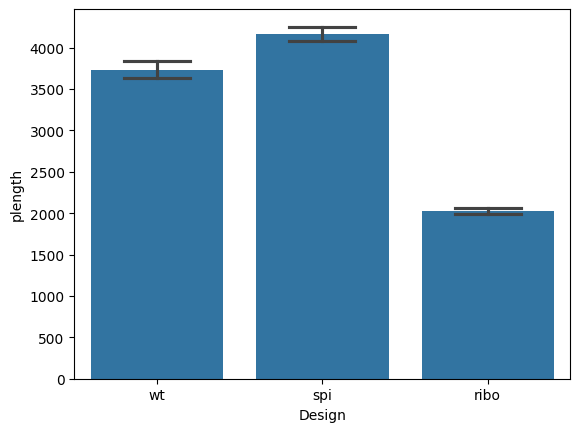

In [16]:
palette = ['#ffbf00','#fc771c','#fe3e09','#9f6458']
sns.barplot(data=filtered_last_df,x='Design',y='plength',capsize=.4)

In [17]:
filtered_last_df

time,plength,std,Design,Run
i64,f64,f64,str,str
900000000,5498.410545,7.707551,"""wt""","""run3"""
900500000,5195.472466,7.683662,"""wt""","""run3"""
901000000,4907.750204,7.430473,"""wt""","""run3"""
901500000,4431.618104,6.597862,"""wt""","""run3"""
902000000,5121.377355,7.203347,"""wt""","""run3"""
…,…,…,…,…
998000000,3994.222212,8.302549,"""spi""","""run3"""
998500000,3940.047598,8.159052,"""spi""","""run3"""
999000000,3965.776087,8.214403,"""spi""","""run3"""


In [40]:
grouped_last = filtered_last_df.group_by(['Design'])
for group_key, group_df in grouped_last:
    # print(group_key)
    # print(group_df)
    ufloat_array = np.array([ufloat(row[1], row[2]) for row in group_df.iter_rows()])
    print(len(ufloat_array))
    # print(ufloat_array)
    print(group_key, np.mean(ufloat_array))

603
('wt',) 3730.42+/-0.33
603
('spi',) 4168.2+/-0.4
603
('ribo',) 2027.89+/-0.20


<Axes: xlabel='time', ylabel='plength'>

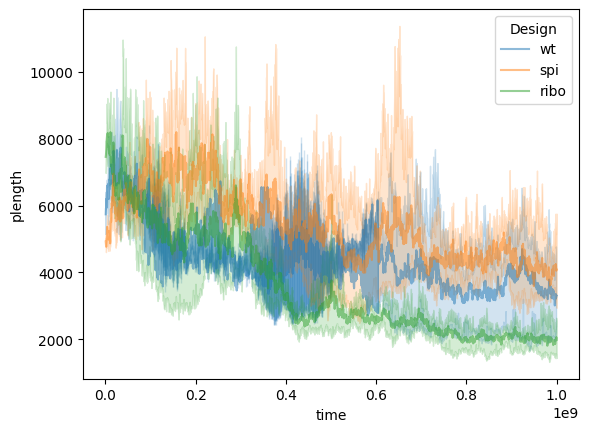

In [13]:
sns.lineplot(data=plength,x='time',y='plength', hue='Design',alpha=0.5)

<Axes: xlabel='time', ylabel='plength'>

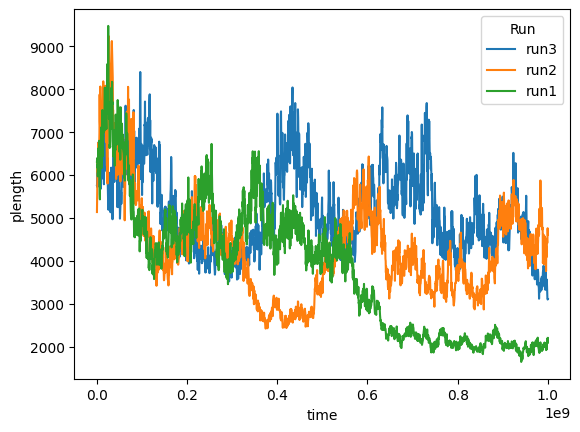

In [12]:
sns.lineplot(data=plength.filter(pl.col('Design') == 'wt'),x='time',y='plength',hue='Run')

<Axes: xlabel='Design', ylabel='plength'>

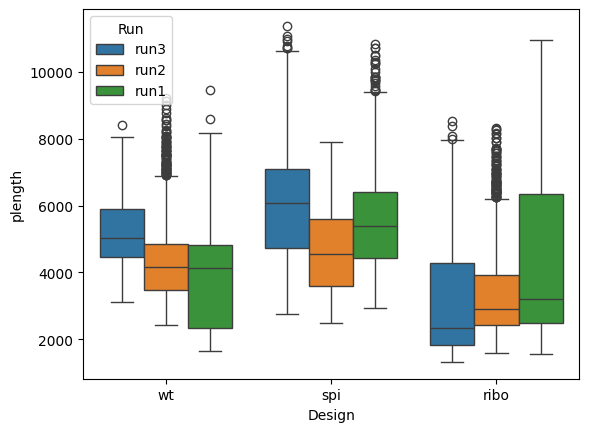

In [10]:
sns.boxplot(data=plength,x='Design',y='plength',hue='Run')